In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os


In [58]:
import xarray as xr

ds = xr.open_mfdataset('..//WILDFIRE-DATA-ANALYSIS//data//*2019.nc')
print(ds)


<xarray.Dataset>
Dimensions:                          (time: 12, lat: 720, lon: 1440,
                                      vegetation_class: 18, bounds: 2)
Coordinates:
  * lat                              (lat) float64 89.88 89.62 ... -89.62 -89.88
  * lon                              (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * time                             (time) datetime64[ns] 2019-01-01 ... 201...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta

In [5]:
##'burned_area', 'standard_error', 'fraction_of_burnable_area', 'fraction_of_observed_area','number_of_patches','burned_area_in_vegetation_class', 
## 'lat', 'lat_bounds', 'lon', 'time', 'time_bounds','vegetation_class_name'

In [3]:
ds.data_vars

Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 720, 1440), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bounds                  

(array([1.2426565e+07, 8.6720000e+03, 3.2590000e+03, 1.5610000e+03,
        7.4400000e+02, 4.1600000e+02, 2.1400000e+02, 1.0700000e+02,
        4.7000000e+01, 1.5000000e+01]),
 array([0.0000000e+00, 7.2136048e+07, 1.4427210e+08, 2.1640813e+08,
        2.8854419e+08, 3.6068022e+08, 4.3281626e+08, 5.0495232e+08,
        5.7708838e+08, 6.4922438e+08, 7.2136045e+08], dtype=float32),
 <BarContainer object of 10 artists>)

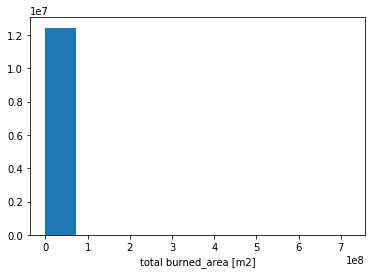

In [27]:
ds.burned_area["lon"].shape

(1440,)

In [47]:
latbounds = [15.603,15.128]
lonbounds = [107.930,108.347]
lats = ds.burned_area["lat"][:]
lons = ds.burned_area["lon"][:]
lat_inds = np.where((lats > latbounds[0]) & (lats < latbounds[1]))
lon_inds = np.where((lons > lonbounds[0]) & (lons < lonbounds[1]))
location  = ds.burned_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

In [64]:
location.values

array([[[      0.]],

       [[      0.]],

       [[      0.]],

       [[2092922.]],

       [[      0.]],

       [[ 429317.]],

       [[      0.]],

       [[      0.]],

       [[      0.]],

       [[      0.]],

       [[      0.]],

       [[      0.]]], dtype=float32)

In [60]:
ds.fraction_of_burnable_area

<xarray.DataArray 'fraction_of_burnable_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of burnable area
    units:      1
    comment:    The fraction of burnable area is the fraction of the cell tha...